In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
import glob
import pickle
import math
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from numpy import array, dot, round, cross, ceil
from numpy.linalg import inv, det, norm
from numpy import cross, dot, ceil
from numpy.linalg import norm, inv
from csl_generator import getsigmas

In [2]:
def get_most_stable_gbenergy_with_indice(filename):
    system_energy = np.loadtxt(f"{filename}")[:,-1]
    gbenergy = np.loadtxt(f"{filename}")[:,-2]
    most_stable_gbenergy = gbenergy[system_energy.argmin()]
    indice = np.loadtxt(f"{filename}")[:,1]
    most_stable_indice = indice[system_energy.argmin()]
    return int(most_stable_indice), most_stable_gbenergy

In [3]:
def get_three_list(first_dirname):
    indice_list = []
    gbe_list = []
    angle_list = []
    for second_dirname in glob.glob(f"{first_dirname}/*gb"):
        indice, gbe = get_most_stable_gbenergy_with_indice(f"{second_dirname}/results")
        filename = second_dirname.split("/")[-1]
        angle = get_angle(filename)
        indice_list.append(indice)
        gbe_list.append(gbe)
        angle_list.append(angle)
    indice_list = np.array(indice_list,dtype=float)
    angle_list = np.array(angle_list,dtype=float)
    gbe_list = np.array(gbe_list,dtype=int)
    return indice_list, gbe_list, angle_list

In [19]:
filename = "Mo100/2_1_0_gb/results"

In [28]:
def get_most_stable_gbenergy_for_each_indice(filename):
    system_energy = np.loadtxt(f"{filename}")[:,-1]
    gbenergy = np.loadtxt(f"{filename}")[:,-2]
    # most_stable_gbenergy = gbenergy[system_energy.argmin()]
    indice = np.loadtxt(f"{filename}")[:,1]
    # most_stable_indice = indice[system_energy.argmin()]
    most_stable_gbenergy_one = gbenergy[indice==1][system_energy[indice==1].argmin()]
    most_stable_gbenergy_two = gbenergy[indice==2][system_energy[indice==2].argmin()]
    return most_stable_gbenergy_one, most_stable_gbenergy_two

In [29]:
def get_angle(filename):
    misangle_list = []
    gbe_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    # for filename in glob.glob(f"{element_name}/*gb"):
    filename_dash = filename.split("/")[-1]
    gbname = filename_dash.split("_")
    gbname = gbname[1:-1]
    gbname = list(map(float, gbname))
    gbname = [-gbname[0],gbname[1],gbname[2]]
    misorientation_list = []
    for base in baselist:
        cos = dot(gbname,base)/(norm(gbname)*norm(base))
        mis_orientation = 2*(np.arccos(cos)/np.pi*180)
        mis_orientation =  abs(mis_orientation)
        misorientation_list.append(mis_orientation)
    mis_angle = min(misorientation_list)
    return mis_angle

In [33]:
def get_100_angle(filename):
    filename_dash = filename.split("/")[-1]
    gbname = filename_dash.split("_")
    gbname = gbname[:-1]
    gbname = list(map(float, gbname))
    tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
    mis_angle = 2*(np.arctan(tang)/np.pi*180)
    return mis_angle

In [42]:
def get_three_value_list(first_dirname):
    one_list = []
    two_list = []
    angle_list = []
    for second_dirname in glob.glob(f"{first_dirname}/*gb"):
        one, two = get_most_stable_gbenergy_for_each_indice(f"{second_dirname}/results")
        filename = second_dirname.split("/")[-1]
        angle = get_100_angle(filename)
        one_list.append(one)
        two_list.append(two)
        angle_list.append(angle)
    one_list = np.array(one_list,dtype=float)
    angle_list = np.array(angle_list,dtype=float)
    two_list = np.array(two_list,dtype=int)
    result = np.array([angle_list,one_list,two_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0,0]),result_sorted,np.array([90,0,0])])
    return result_sorted

In [38]:
one, two, angle = get_three_value_list("Mo100")

In [43]:
result_sorted = get_three_value_list("Mo100")

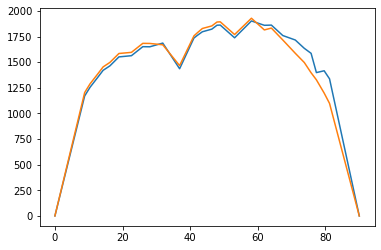

In [45]:
plt.plot(result_sorted[:,0], result_sorted[:,1])
plt.plot(result_sorted[:,0], result_sorted[:,2])

In [46]:
result_df = pd.DataFrame(result_sorted)

In [47]:
result_df.to_excel("result_Mo100.xlsx")